In [1]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.utils.testing import  ignore_warnings

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_recall_curve,f1_score,auc,average_precision_score,roc_curve,roc_auc_score,average_precision_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib 

matplotlib.style.use('ggplot')

In [2]:
#Reading data from csv files

audit_risk=pd.read_csv("audit_risk.csv")
trial=pd.read_csv("trial.csv")

In [3]:
audit_risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
#Replacing string values with respective ID's for both Datasets

In [5]:
audit_risk.loc[audit_risk['LOCATION_ID'].isin(['LOHARU','NUH','SAFIDON'])]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
351,1.99,LOHARU,0.30,0.2,0.060,0.0,0.2,0.0,0.30,5.0,...,0.4,0,0.2,0.0,2.0,1.460,0.4,0.5,0.2920,0
355,1.99,NUH,0.55,0.2,0.110,0.0,0.2,0.0,0.55,5.0,...,0.4,0,0.2,0.0,2.0,1.644,0.4,0.5,0.3288,0
367,1.99,SAFIDON,0.48,0.2,0.096,0.0,0.2,0.0,0.48,5.0,...,0.4,0,0.2,0.0,2.0,1.590,0.4,0.5,0.3180,0


In [6]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [7]:
trial.loc[trial['LOCATION_ID'].isin(['LOHARU','NUH','SAFIDON'])]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
351,1.99,LOHARU,0.30,2,0.0,2,0.30,5.0,2,0.00,2,2,0,2,0,2,2.0,0
355,1.99,NUH,0.55,2,0.0,2,0.55,5.0,2,0.67,2,2,0,2,0,2,2.0,0
367,1.99,SAFIDON,0.48,2,0.0,2,0.48,5.0,2,0.47,2,2,0,2,0,2,2.0,0


In [8]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [9]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [10]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [11]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [12]:
audit_risk.shape

(776, 27)

In [13]:
audit_risk = audit_risk[np.isfinite(audit_risk['Money_Value'])] #Taking only finite values for money value for Audit Risk data

In [14]:
trial = trial[np.isfinite(trial['Money_Value'])] #Taking only finite values for money value for Trial data

In [15]:
audit_risk.shape

(775, 27)

In [16]:
audit_risk.LOCATION_ID = audit_risk.LOCATION_ID.replace({"LOHARU": "45", "NUH": "46","SAFIDON" : "47"}) #Replacing string values in Audit Risk data

In [17]:
trial.LOCATION_ID = trial.LOCATION_ID.replace({"LOHARU": "45", "NUH": "46","SAFIDON" : "47"}) #Replacing string values in trial data

In [18]:
print(audit_risk.loc[[351,355,367]])

     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
351          1.99          45    0.30      0.2   0.060     0.0      0.2   
355          1.99          46    0.55      0.2   0.110     0.0      0.2   
367          1.99          47    0.48      0.2   0.096     0.0      0.2   

     Risk_B  TOTAL  numbers  ...   RiSk_E  History  Prob  Risk_F  Score  \
351     0.0   0.30      5.0  ...      0.4        0   0.2     0.0    2.0   
355     0.0   0.55      5.0  ...      0.4        0   0.2     0.0    2.0   
367     0.0   0.48      5.0  ...      0.4        0   0.2     0.0    2.0   

     Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk  Risk  
351          1.460           0.4             0.5      0.2920     0  
355          1.644           0.4             0.5      0.3288     0  
367          1.590           0.4             0.5      0.3180     0  

[3 rows x 27 columns]


In [19]:
print(trial.loc[[351,355,367]])

     Sector_score LOCATION_ID  PARA_A  SCORE_A  PARA_B  SCORE_B  TOTAL  \
351          1.99          45    0.30        2     0.0        2   0.30   
355          1.99          46    0.55        2     0.0        2   0.55   
367          1.99          47    0.48        2     0.0        2   0.48   

     numbers  Marks  Money_Value  MONEY_Marks  District  Loss  LOSS_SCORE  \
351      5.0      2         0.00            2         2     0           2   
355      5.0      2         0.67            2         2     0           2   
367      5.0      2         0.47            2         2     0           2   

     History  History_score  Score  Risk  
351        0              2    2.0     0  
355        0              2    2.0     0  
367        0              2    2.0     0  


In [20]:
trial.isnull().sum()  #Checking for null values

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [21]:
#Now that we have removed Null values and replaced string values of location ID in both data sets, we shall be merging them

In [22]:
final = pd.merge(audit_risk,trial,how='outer')

In [23]:
final.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,6.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.3096,0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,3.5060,1,2.0,6.0,6.0,6.0,2.0,0.0,2.0,2.0
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2832,0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0


In [24]:
final.shape

(990, 35)

In [25]:
final.isnull().sum()

Sector_score        0
LOCATION_ID         0
PARA_A              0
Score_A           181
Risk_A            181
PARA_B              0
Score_B           181
Risk_B            181
TOTAL               0
numbers             0
Score_B.1         181
Risk_C            181
Money_Value         0
Score_MV          181
Risk_D            181
District_Loss     181
PROB              181
RiSk_E            181
History             0
Prob              181
Risk_F            181
Score               0
Inherent_Risk     181
CONTROL_RISK      181
Detection_Risk    181
Audit_Risk        181
Risk                0
SCORE_A           181
SCORE_B           181
Marks             181
MONEY_Marks       181
District          181
Loss              181
LOSS_SCORE        181
History_score     181
dtype: int64

In [26]:
final.duplicated().sum() #Locating duplicates in data set

47

In [27]:
final.drop_duplicates(keep='first',inplace = True)

In [28]:
final.shape

(943, 35)

In [29]:
final.fillna(final.mean(), inplace = True) #Imputing missing values with mean 

In [30]:
final.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
SCORE_A           0
SCORE_B           0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
dtype: int64

In [31]:
# Applying scaling
#Applying MinMaxScaler as it provides lower standard deviations and it suppresses the effect of outliers

In [32]:
scaler = MinMaxScaler()

In [33]:
from sklearn.utils.testing import  ignore_warnings
final = scaler.fit_transform(final)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
type(final)

numpy.ndarray

In [35]:
columns_new = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History' , 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', ' Detection_Risk', 'Audit_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks', 'District' , 'Loss', 'LOSS_SCORE', 'History_score']
final1 = pd.DataFrame(final,columns = columns_new)

In [36]:
final1.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,0.312894,0.303287,0.026853,0.385171,0.026974,0.007143,0.288058,0.008501,0.008897,0.014183,...,0.007296,0.514316,0.385171,0.288058,0.060367,0.231627,0.127297,0.015092,0.015748,0.042651
std,0.420177,0.215532,0.060977,0.391934,0.061103,0.036051,0.383471,0.035934,0.036829,0.060526,...,0.036477,0.500060,0.391934,0.383471,0.182059,0.361155,0.276758,0.083555,0.085032,0.154081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.008966,0.152174,0.003765,0.000000,0.001647,0.000000,0.000000,0.000000,0.000599,0.000000,...,0.000062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.026897,0.260870,0.012353,0.385171,0.010510,0.000293,0.000000,0.000261,0.001198,0.000000,...,0.000972,1.000000,0.385171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.926207,0.391304,0.026647,0.500000,0.026974,0.001728,0.500000,0.008501,0.004397,0.000000,...,0.007296,1.000000,0.500000,0.500000,0.060367,0.231627,0.127297,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
final1

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,0.035172,0.478261,0.049176,1.000000,0.049176,0.001977,0.000000,0.000659,0.005264,0.000,...,0.001493,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.035172,0.108696,0.000000,0.000000,0.000000,0.003819,0.000000,0.001273,0.003806,0.000,...,0.000240,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.035172,0.108696,0.006000,0.000000,0.002000,0.000182,0.000000,0.000061,0.000583,0.000,...,0.000031,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.035172,0.108696,0.000000,0.000000,0.000000,0.008540,1.000000,0.008540,0.008511,0.250,...,0.003356,1.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4,0.035172,0.108696,0.000000,0.000000,0.000000,0.000063,0.000000,0.000021,0.000063,0.000,...,0.000003,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.035172,0.108696,0.000000,0.000000,0.000000,0.000656,0.000000,0.000219,0.000654,0.000,...,0.000157,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.035172,0.130435,0.012941,0.500000,0.008627,0.005859,0.500000,0.003906,0.006707,0.000,...,0.006320,1.0,0.500000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
7,0.035172,0.152174,0.100000,1.000000,0.100000,0.009513,1.000000,0.009513,0.016179,0.125,...,0.003461,1.0,1.000000,1.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
8,0.035172,0.152174,0.098824,1.000000,0.098824,0.008738,1.000000,0.008738,0.015328,0.125,...,0.003289,1.0,1.000000,1.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
9,0.035172,0.152174,0.046824,1.000000,0.046824,0.000783,0.000000,0.000261,0.003917,0.000,...,0.000618,0.0,0.385171,0.288058,0.060367,0.231627,0.127297,0.015092,0.015748,0.042651


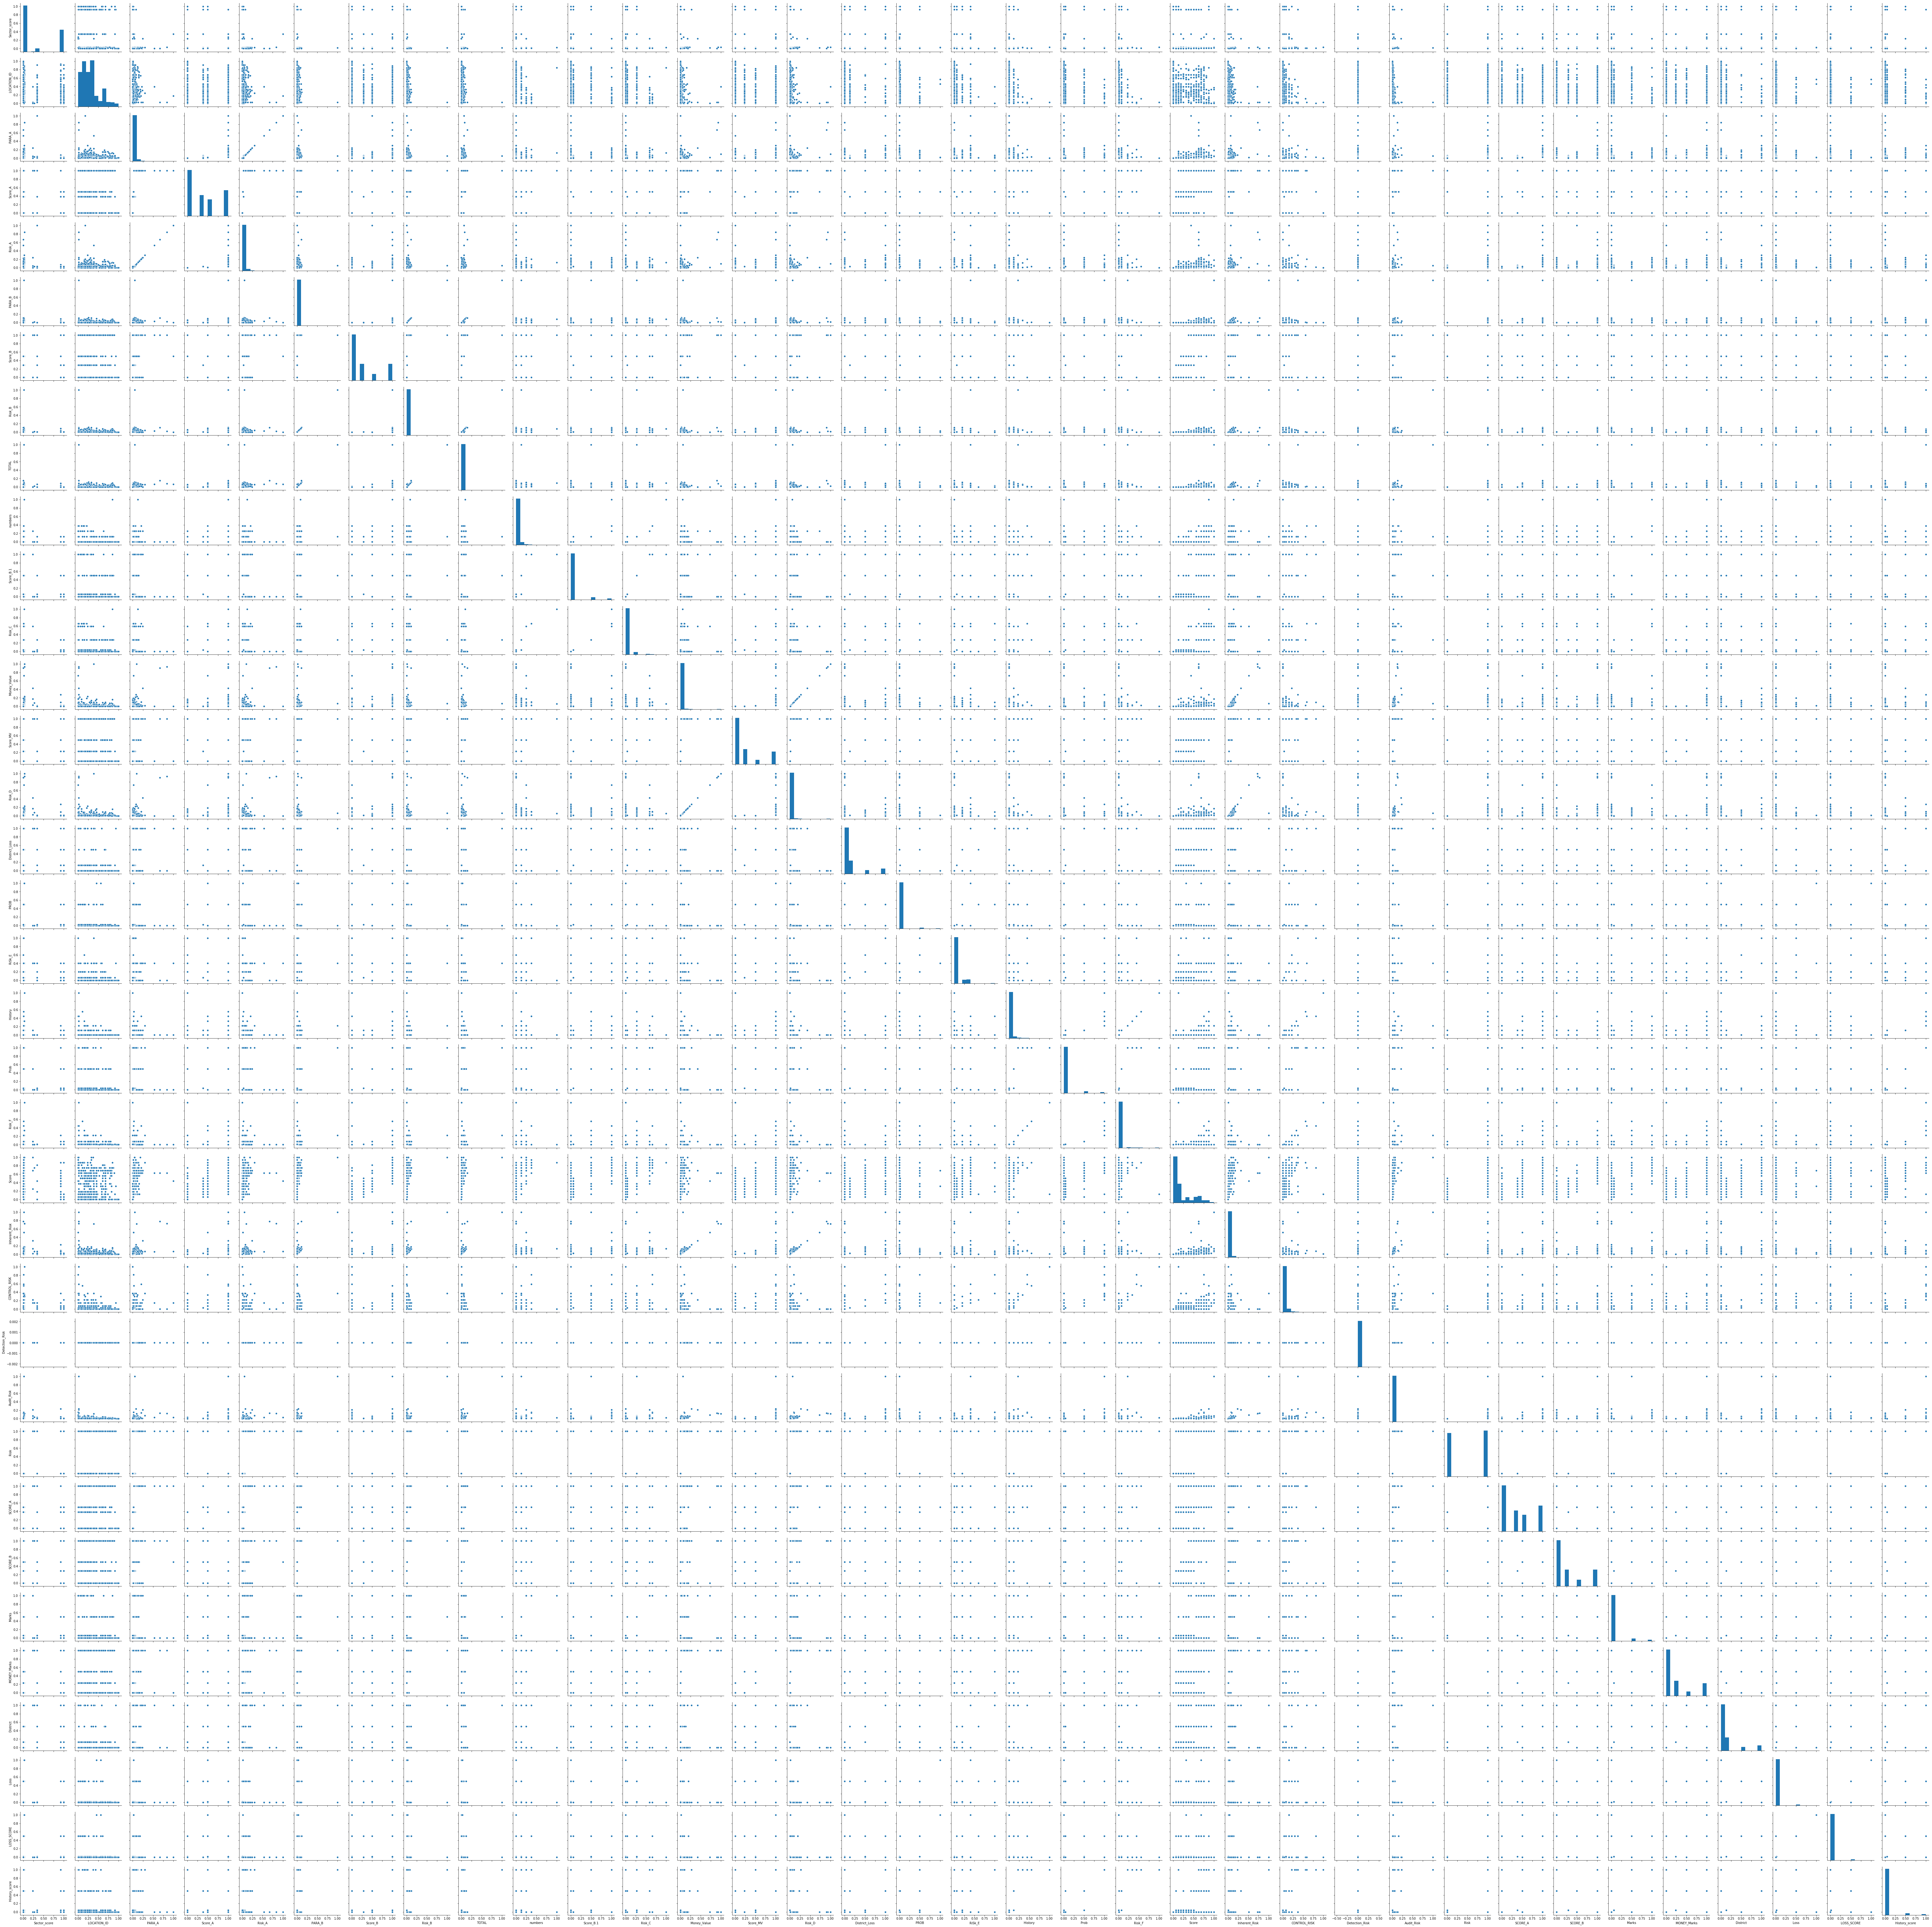

In [693]:
sns.pairplot(final1)

In [822]:
#Applying corelation to drop unwanted features with low corelation value to perform Regression task on the dataset with better performance

In [38]:
trial["Audit_Risk"] = trial.Risk

In [39]:
X = final1.drop("Audit_Risk",1)   #Feature Matrix
y = final1["Audit_Risk"]          #Target Variable
final1.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,0.035172,0.478261,0.049176,1.0,0.049176,0.001977,0.0,0.000659,0.005264,0.00,...,0.001493,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035172,0.108696,0.000000,0.0,0.000000,0.003819,0.0,0.001273,0.003806,0.00,...,0.000240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035172,0.108696,0.006000,0.0,0.002000,0.000182,0.0,0.000061,0.000583,0.00,...,0.000031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035172,0.108696,0.000000,0.0,0.000000,0.008540,1.0,0.008540,0.008511,0.25,...,0.003356,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.035172,0.108696,0.000000,0.0,0.000000,0.000063,0.0,0.000021,0.000063,0.00,...,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


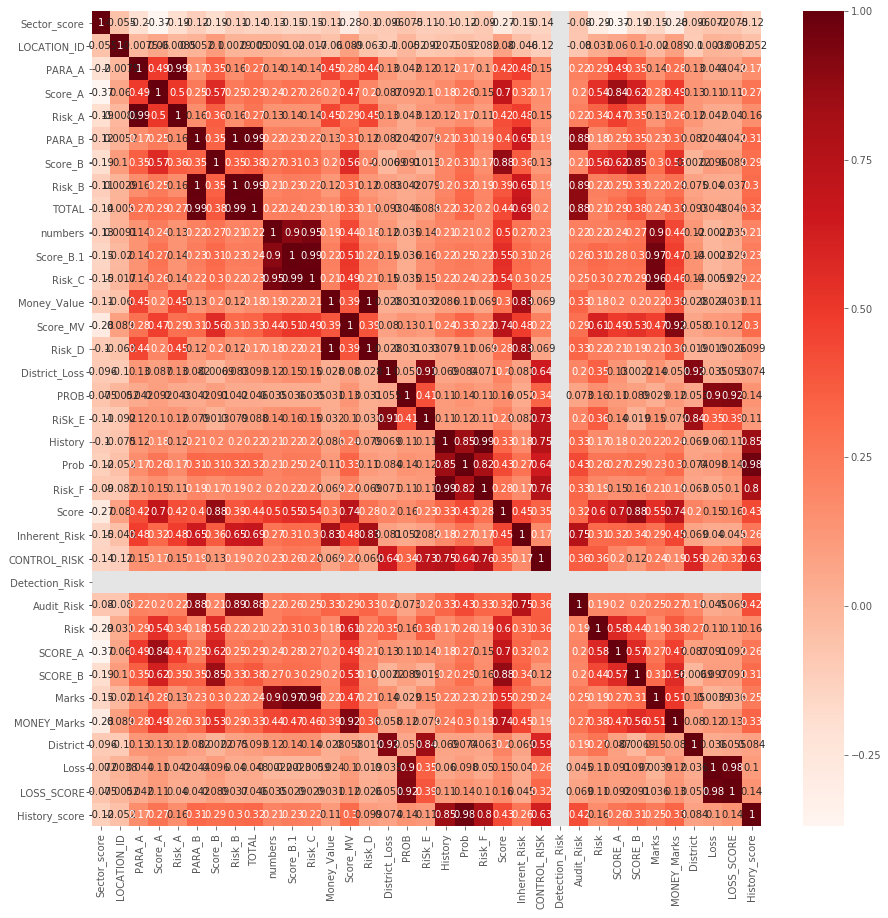

In [40]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = final1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [41]:
#Finding Correlation with output variable
cor_target = abs(cor["Audit_Risk"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.30]
relevant_features

PARA_B           0.884182
Risk_B           0.887503
TOTAL            0.883922
Money_Value      0.332253
Risk_D           0.333741
History          0.327493
Prob             0.430875
Risk_F           0.327368
Score            0.323421
Inherent_Risk    0.750763
CONTROL_RISK     0.358134
Audit_Risk       1.000000
History_score    0.421331
Name: Audit_Risk, dtype: float64

In [42]:
#Correlation with target variable
cor_target = abs(cor["Audit_Risk"])
#Selecting highly correlated features
relevant_features1 = cor_target[cor_target < 0]
relevant_features1

Series([], Name: Audit_Risk, dtype: float64)

In [43]:
relevant_features1

Series([], Name: Audit_Risk, dtype: float64)

# Applying Regression Models

# Linear Regression

In [829]:
X = final1[['PARA_B' , 'Risk_B' , 'TOTAL' , 'Money_Value', 'Risk_D', 'History', 'Prob', 'Risk_F', 'TOTAL', 'Score', 'Inherent_Risk','CONTROL_RISK', 'History_score']]
y = final1['Audit_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [836]:
import seaborn as sns
%matplotlib inline

C:\Users\anike\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anike\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\anike\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\anike\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


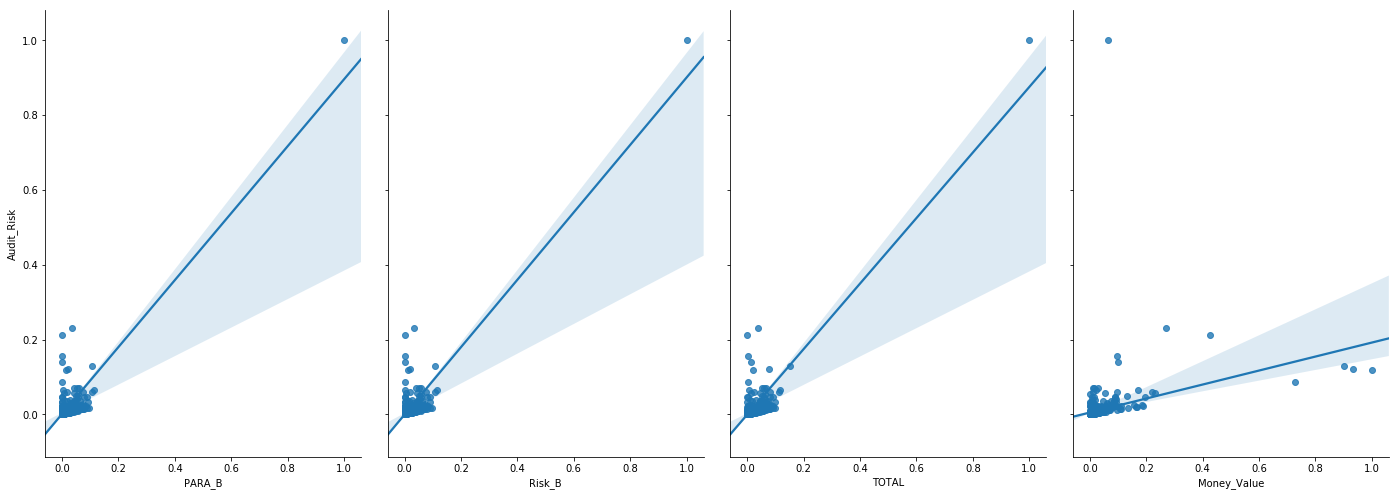

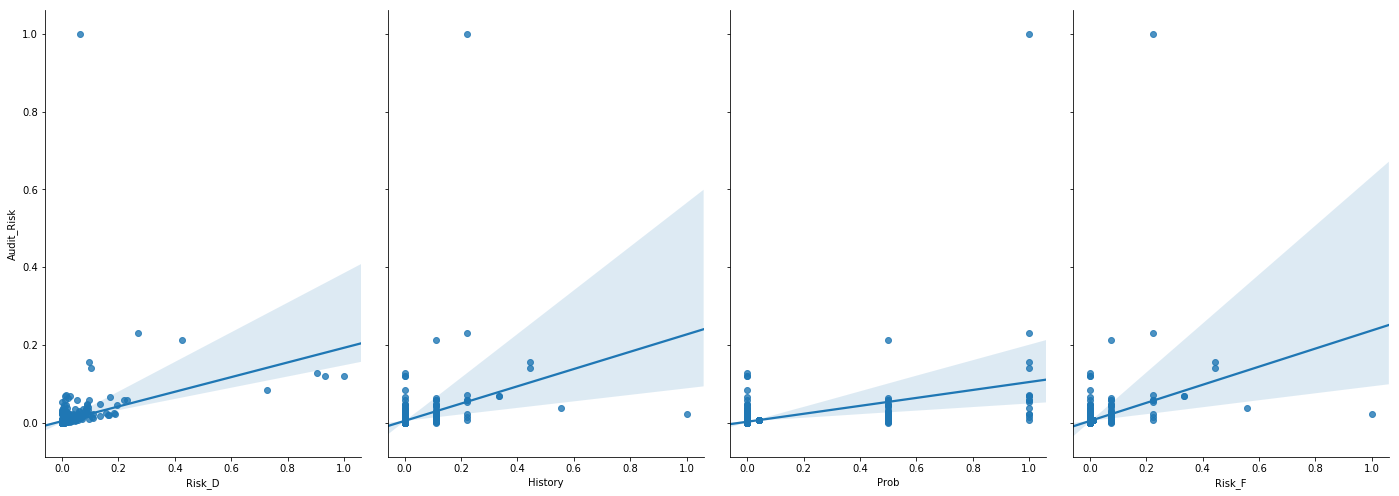

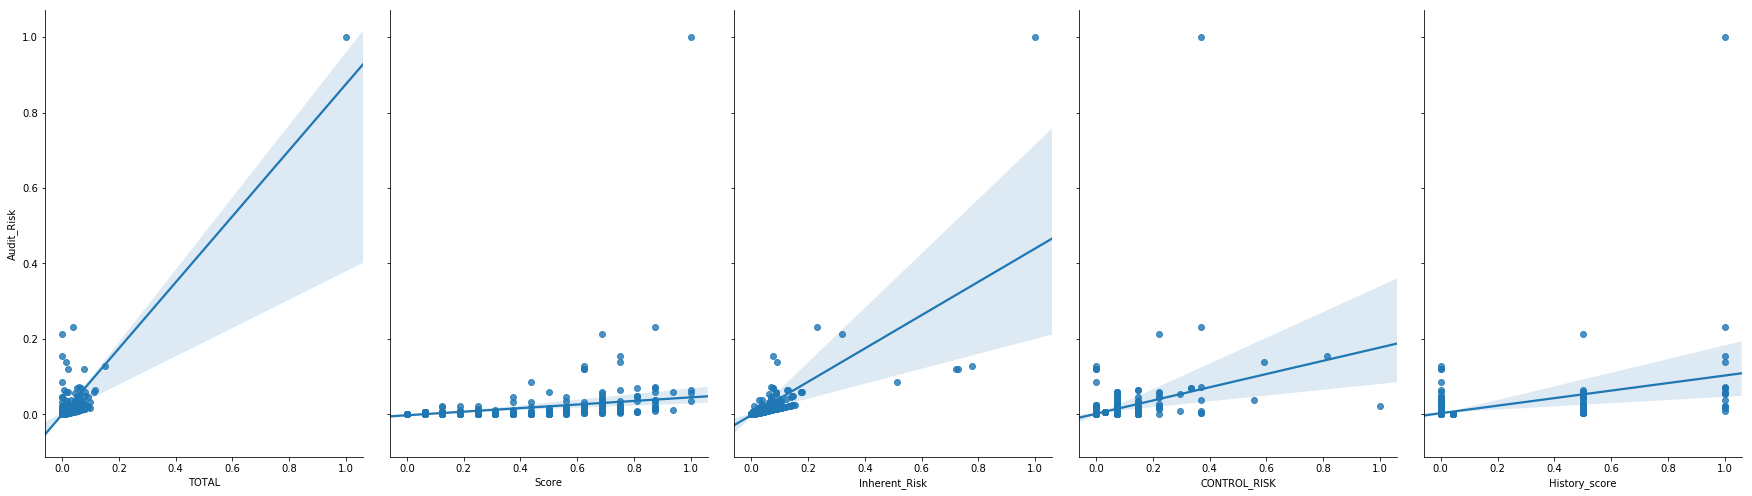

In [1219]:
from sklearn.utils.testing import  ignore_warnings
# visualizing the relationship between the features and the response using scatterplots
sns.pairplot(final1, x_vars=['PARA_B' , 'Risk_B' , 'TOTAL' , 'Money_Value'], y_vars='Audit_Risk', size=7, aspect=0.7, kind='reg')
sns.pairplot(final1, x_vars=['Risk_D', 'History', 'Prob', 'Risk_F'], y_vars='Audit_Risk', size=7, aspect=0.7, kind='reg')
sns.pairplot(final1, x_vars=[ 'TOTAL', 'Score', 'Inherent_Risk','CONTROL_RISK','History_score'], y_vars='Audit_Risk', size=7, aspect=0.7, kind='reg')


In [976]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression(n_jobs = -1)
linearModel.fit(X_train,y_train.values.ravel())

lr_score = cross_val_score(linearModel,X_train,y_train,cv=11)
print("Cross Validation Scores are: {}".format(lr_score))

Cross Validation Scores are: [ 0.68919181  0.77086216 -0.61913804  0.69167624  0.12619989  0.76337536
  0.87282843  0.83356929  0.85573524  0.65269437  0.59046689]


In [977]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [979]:
lm.fit(X_train, y_train)
print('Train score: {:.4f}'.format(lm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lm.score(X_test, y_test)))

Train score: 0.8169
Test score: 0.5333


In [840]:
y_te = lm.predict(X_test)
y_te

array([ 7.84120285e-05, -2.32845716e-03,  9.09337895e-03, -1.62211233e-03,
        4.92603482e-04,  1.73992655e-04,  1.03673925e-03,  8.52352335e-03,
        1.01457739e-02, -1.85997757e-03, -8.58834204e-04,  5.30378110e-03,
        9.00655566e-03, -4.90744944e-04,  8.40076093e-03, -2.28058708e-03,
       -1.37518822e-03, -5.21218119e-04,  5.57870103e-03,  3.88950508e-03,
       -1.45832454e-02,  4.98781529e-04, -6.25881743e-04, -7.76443953e-04,
        1.23802282e-02,  9.56586987e-03, -1.93177087e-04, -1.51420660e-03,
        8.25313506e-03, -2.14632432e-03, -7.34326740e-04,  8.12397561e-03,
       -1.71280430e-03,  3.55203681e-04,  1.21006081e-01, -2.34848160e-03,
       -1.05694717e-03, -9.38273283e-04,  4.25482254e-04, -1.93126177e-03,
       -8.47428733e-04,  8.54488061e-03,  1.91227484e-02, -1.24826492e-03,
       -1.34912669e-03,  1.44227685e-02, -7.79512155e-04, -1.30410363e-03,
        3.41928319e-02,  1.18326956e-02,  2.58996640e-02, -3.18015364e-03,
       -4.08549759e-03,  

In [841]:
lm.score(X_train,y_train)

0.8169371072127188

In [842]:
lm.coef_

array([ 4.29953136, -4.28223832, -1.94666379,  0.17377729, -3.05495181,
       -0.37364275,  0.02432298,  0.28641921, -1.94666379, -0.00877945,
        4.3283279 ,  0.04607514,  0.03350676])

In [843]:
lm.intercept_

-0.000521218119246796

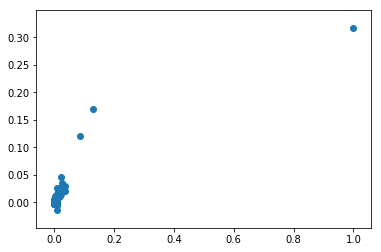

In [844]:
plt.scatter(y_test,y_te)

In [371]:
X_test

,PARA_B,Risk_B,TOTAL,Money_Value,Risk_D,History,Prob,Risk_F,TOTAL,Score,Inherent_Risk,CONTROL_RISK,History_score
844,0.000142,0.008501,0.003034,0.000000,0.015004,0.000000,0.042651,0.010110,0.003034,0.1250,0.020727,0.032371,0.000000
179,0.000000,0.000000,0.000717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000717,0.0000,0.000228,0.000000,0.000000
323,0.000735,0.000245,0.002451,0.000000,0.000000,0.000000,0.000000,0.000000,0.002451,0.2500,0.002868,0.148148,0.000000
281,0.008342,0.008342,0.011009,0.007444,0.004962,0.000000,0.000000,0.000000,0.011009,0.5625,0.013960,0.000000,0.000000
389,0.000000,0.000000,0.002916,0.000128,0.000043,0.000000,0.000000,0.000000,0.002916,0.1250,0.002805,0.000000,0.042651
32,0.001392,0.000464,0.001387,0.001155,0.000385,0.000000,0.000000,0.000000,0.001387,0.0000,0.000710,0.000000,0.000000
132,0.022188,0.022188,0.022768,0.014235,0.014235,0.000000,0.000000,0.000000,0.022768,0.5000,0.031240,0.000000,0.000000
313,0.000000,0.000000,0.000402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000402,0.1250,0.001128,0.148148,0.000000
98,0.001313,0.000438,0.001308,0.000813,0.000271,0.000000,0.000000,0.000000,0.001308,0.1250,0.001605,0.148148,0.000000
712,0.000198,0.000066,0.000757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000757,0.0000,0.000240,0.000000,0.000000


# K Nearest Neighbors Regressor

In [848]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_recall_curve,f1_score,auc,average_precision_score,roc_curve,roc_auc_score,average_precision_score
from sklearn.metrics import classification_report,confusion_matrix

In [849]:
X = final1[['PARA_B' , 'Risk_B' , 'TOTAL' , 'Money_Value', 'Risk_D', 'History', 'Prob', 'Risk_F', 'TOTAL', 'Score', 'Inherent_Risk','CONTROL_RISK', 'History_score']]
y = final1['Audit_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [850]:
from sklearn.neighbors import KNeighborsRegressor
knn_param = {'n_neighbors':[1, 5, 10, 15, 20]}
knn_reg = KNeighborsRegressor()
knngrid = GridSearchCV(estimator = knn_reg,param_grid=knn_param,n_jobs=-1,cv=11,scoring='r2')
knngrid.fit(X_train,y_train)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=11, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [851]:

print(knngrid.score(X_train,y_train.values))
print(knngrid.score(X_test,y_test))

0.5669002565205865
0.1252300220477348


In [852]:
knngrid.best_params_

{'n_neighbors': 20}

In [669]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 101)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [855]:
knn = KNeighborsRegressor(20)    #Passing k= 20 as recommended above for best value of k
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.5669
Test score: 0.1252


In [952]:
y_pr=knn.predict(X_test)
y_pr

array([7.29612757e-03, 3.56208642e-05, 3.08397577e-03, 2.62006853e-03,
       4.14675130e-04, 7.98764589e-05, 2.75757921e-03, 1.31052322e-03,
       1.31564164e-03, 3.79303945e-05, 6.64520537e-06, 5.22536439e-04,
       3.61458371e-03, 1.35055508e-04, 7.29612757e-03, 3.14574676e-04,
       1.67253690e-05, 0.00000000e+00, 5.22536439e-04, 5.53080497e-04,
       2.71837962e-04, 4.14675130e-04, 9.93514173e-05, 1.01486172e-05,
       1.07918110e-02, 3.08397577e-03, 4.50129542e-05, 2.03956496e-05,
       7.08622618e-03, 1.46540740e-04, 1.00391746e-04, 1.31564164e-03,
       2.42604717e-05, 3.83548487e-04, 4.44586045e-02, 3.71605511e-05,
       1.16928816e-05, 1.00653909e-05, 3.83548487e-04, 3.10226101e-05,
       9.91974486e-06, 7.29612757e-03, 2.24675272e-02, 5.21620949e-05,
       3.40603707e-05, 1.50202906e-02, 1.05114840e-04, 2.05777072e-05,
       1.85806292e-02, 1.16863275e-02, 1.63400727e-02, 2.25705614e-03,
       4.24664827e-03, 7.29612757e-03, 2.37819204e-05, 7.29612757e-03,
      

Text(0, 0.5, 'MSE')

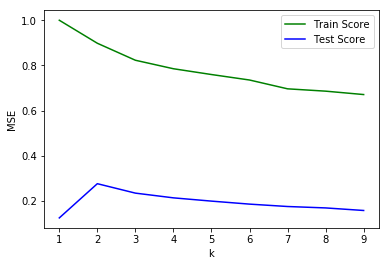

In [856]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

# SGD Regressor

In [911]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state = 0)

#GridSearchCV for parameters for SGDRegressor

sgd_param = {
    'max_iter':[1000,10000,100000],
    'penalty': ['l1','l2'],
    'alpha':[0.1,1,10,100]
}

gridsgd = GridSearchCV(estimator = sgd,param_grid = sgd_param,n_jobs=-1,cv=10,scoring='r2')
gridsgd.fit(X_train,y_train.values)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [1000, 10000, 100000], 'penalty': ['l1', 'l2'], 'alpha': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [913]:
gridsgd.best_params_

{'alpha': 0.1, 'max_iter': 10000, 'penalty': 'l2'}

In [914]:
gridsgd.score(X_train,y_train.values)
gridsgd.score(X_test,y_test.values)

0.07639417106312074

In [915]:
grid_sgd_train_prediction = gridsgd.predict(X_train)
grid_sgd_test_prediction = gridsgd.predict(X_test)

In [916]:
print('Train r2_score: %.2f'%r2_score(grid_sgd_train_prediction, y_train))
print('Test r2_score: %.2f '%r2_score(grid_sgd_test_prediction, y_test))

Train r2_score: -5.37
Test r2_score: -203.27 


In [917]:
X = final1[['PARA_B' , 'Risk_B' , 'TOTAL' , 'Money_Value', 'Risk_D', 'History', 'Prob', 'Risk_F', 'TOTAL', 'Score', 'Inherent_Risk','CONTROL_RISK', 'History_score']]
y = final1['Audit_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [918]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(alpha= 0.1, random_state= 0, max_iter = 100000, penalty = 'l2')
sgd_reg.fit(X_train, y_train)

print('Train score: {:.4f}'.format(sgd_reg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(sgd_reg.score(X_test, y_test)))

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Train score: 0.3587
Test score: 0.0764


In [954]:
y_pr=sgd_reg.predict(X_test)
y_pr

array([0.00496062, 0.00281548, 0.00629302, 0.00919983, 0.00459106,
       0.0028282 , 0.00871107, 0.00489738, 0.00490791, 0.00281576,
       0.00281372, 0.00423382, 0.00738053, 0.00389053, 0.00426567,
       0.00596601, 0.00281434, 0.00281332, 0.00423363, 0.00492854,
       0.00896731, 0.00458919, 0.00388453, 0.00281389, 0.0117197 ,
       0.00631153, 0.0028179 , 0.00281451, 0.00636681, 0.00527116,
       0.00388495, 0.004899  , 0.00281474, 0.00458526, 0.01794434,
       0.0028165 , 0.00281397, 0.00281382, 0.00458951, 0.00281501,
       0.00281384, 0.00426532, 0.02100608, 0.00281955, 0.00281555,
       0.0113401 , 0.00388513, 0.00281463, 0.01363976, 0.01126644,
       0.01154974, 0.00914376, 0.00703925, 0.00426585, 0.00281902,
       0.0049598 , 0.00920864, 0.00282713, 0.00281762, 0.01063297,
       0.00559736, 0.00281474, 0.0028135 , 0.04302381, 0.00426398,
       0.00281349, 0.01153103, 0.00426649, 0.00281401, 0.00281462,
       0.00281653, 0.02064319, 0.00602196, 0.02115805, 0.00431

In [955]:
sgd_reg.coef_

array([0.00059715, 0.00063719, 0.0007616 , 0.00537565, 0.00544952,
       0.0026939 , 0.00929576, 0.00259326, 0.0007616 , 0.01107003,
       0.00469161, 0.00468723, 0.00880318])

In [920]:
sgd_reg.intercept_

array([0.00281332])

In [921]:
sgd_reg.n_iter_

100000

# Polynomial regression

In [1226]:
X = final1[['PARA_B' , 'Risk_B' , 'TOTAL' , 'Money_Value', 'Risk_D', 'History', 'Prob', 'Risk_F', 'TOTAL', 'Score', 'Inherent_Risk','CONTROL_RISK', 'History_score']]
y = final1['Audit_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

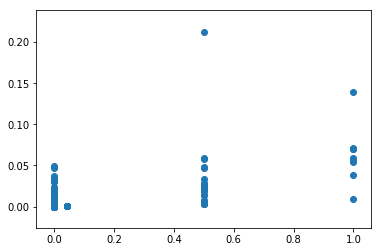

In [1227]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train.iloc[:,12]
plt.scatter(X_train_1,y_train)

In [1228]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [1229]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [1230]:
print(train_score_list)
print(test_score_list)

[0.91713763343315, 1.0]
[0.42512769282466656, 0.9997120857835701]


In [1231]:
lreg.fit(X_train, y_train)
print('Train score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lreg.score(X_test, y_test)))

Train score: 0.9171
Test score: 0.4251


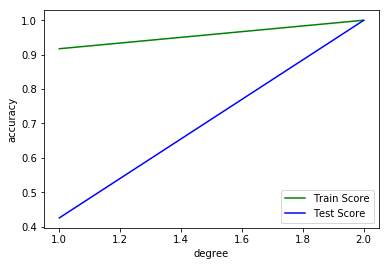

In [1233]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

# Ridge 

In [891]:
X = final1[['PARA_B' , 'Risk_B' , 'TOTAL' , 'Money_Value', 'Risk_D', 'History', 'Prob', 'Risk_F', 'TOTAL', 'Score', 'Inherent_Risk','CONTROL_RISK', 'History_score']]
y = final1['Audit_Risk']

In [901]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 690 to 863
Data columns (total 13 columns):
PARA_B           754 non-null float64
Risk_B           754 non-null float64
TOTAL            754 non-null float64
Money_Value      754 non-null float64
Risk_D           754 non-null float64
History          754 non-null float64
Prob             754 non-null float64
Risk_F           754 non-null float64
TOTAL            754 non-null float64
Score            754 non-null float64
Inherent_Risk    754 non-null float64
CONTROL_RISK     754 non-null float64
History_score    754 non-null float64
dtypes: float64(13)
memory usage: 82.5 KB


In [902]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 13 columns):
PARA_B           943 non-null float64
Risk_B           943 non-null float64
TOTAL            943 non-null float64
Money_Value      943 non-null float64
Risk_D           943 non-null float64
History          943 non-null float64
Prob             943 non-null float64
Risk_F           943 non-null float64
TOTAL            943 non-null float64
Score            943 non-null float64
Inherent_Risk    943 non-null float64
CONTROL_RISK     943 non-null float64
History_score    943 non-null float64
dtypes: float64(13)
memory usage: 95.9 KB


In [892]:
from sklearn.linear_model import Ridge
ridge_param = {'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}
ridge_reg = Ridge()
gridridge = GridSearchCV(estimator = ridge_reg,param_grid = ridge_param,n_jobs=-1,cv=10,scoring='r2')
gridridge.fit(X_train,y_train.values)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [893]:
gridridge.best_params_     #Estimating best values for alpha 

{'alpha': 1}

In [894]:
from  sklearn.linear_model import Ridge

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [896]:
print(train_score_list)
print(test_score_list)

[0.7841304896436017, 0.7722744968335611, 0.7631813485015743, 0.7383529042971132, 0.6035059965346027, 0.3153904266191384]
[0.5059122992420415, 0.49403670399460886, 0.44172134958397635, 0.2929447993564377, 0.17083234508092116, 0.06415288815697096]


In [904]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7723
Test score: 0.4940


In [961]:
y_pr=ridge.predict(X_test)
y_pr

array([ 7.33809612e-03, -1.65539434e-03,  1.04080849e-02,  3.46498809e-04,
       -1.68073679e-04, -1.49940172e-03,  4.64000884e-03,  1.03630161e-02,
        1.04927965e-02, -1.64327181e-03, -1.65471400e-03,  5.70493074e-03,
        1.00449274e-02, -3.29327427e-04,  7.58938897e-03, -5.92747581e-04,
       -1.65495304e-03, -1.65455771e-03,  5.69700644e-03,  5.65234529e-03,
        2.02270322e-03, -2.03025336e-04, -3.90387541e-04, -1.65086605e-03,
        9.27554812e-03,  1.07747194e-02, -1.59388088e-03, -1.65501739e-03,
        7.26048990e-03, -5.53171128e-04, -3.84230078e-04,  1.03790228e-02,
       -1.65510933e-03, -2.86699600e-04,  1.20286212e-01, -1.64817025e-03,
       -1.65472476e-03, -1.65475078e-03, -2.55151741e-04, -1.65521046e-03,
       -1.65280382e-03,  7.59159218e-03,  2.66163693e-02, -1.60536963e-03,
       -1.63732061e-03,  1.81798685e-02, -3.81664469e-04, -1.64968164e-03,
        3.27415999e-02,  1.41241265e-02,  2.81506052e-02, -9.21356521e-04,
        6.93678068e-03,  

In [898]:
ridge.coef_

array([ 0.04940571,  0.03644656, -0.03372187,  0.0084965 ,  0.0126852 ,
       -0.18958184,  0.0194567 ,  0.11143575, -0.03372187, -0.0018043 ,
        0.2088902 ,  0.08123391,  0.03097257])

In [912]:
ridge.intercept_

-0.0016545577091890166

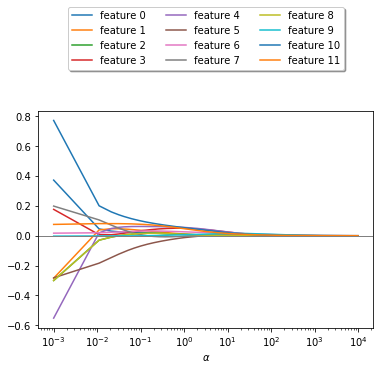

In [900]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,12):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# LASSO

In [962]:
X = final1[['PARA_B' , 'Risk_B' , 'TOTAL' , 'Money_Value', 'Risk_D', 'History', 'Prob', 'Risk_F', 'TOTAL', 'Score', 'Inherent_Risk','CONTROL_RISK', 'History_score']]
y = final1['Audit_Risk']

In [963]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 690 to 863
Data columns (total 13 columns):
PARA_B           754 non-null float64
Risk_B           754 non-null float64
TOTAL            754 non-null float64
Money_Value      754 non-null float64
Risk_D           754 non-null float64
History          754 non-null float64
Prob             754 non-null float64
Risk_F           754 non-null float64
TOTAL            754 non-null float64
Score            754 non-null float64
Inherent_Risk    754 non-null float64
CONTROL_RISK     754 non-null float64
History_score    754 non-null float64
dtypes: float64(13)
memory usage: 82.5 KB


In [964]:
from sklearn.linear_model import Lasso
lasso_param = {'alpha':[0.01, 0.1, 1, 10, 100,1000]}
lasso_reg = Lasso()
gridlasso = GridSearchCV(estimator = lasso_reg,param_grid = lasso_param,n_jobs=-1,cv=10,scoring='r2')
gridlasso.fit(X_train,y_train.values)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [965]:
gridlasso.best_params_              #Estimating best values for alpha

{'alpha': 0.01}

In [966]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [967]:
print(train_score_list)
print(test_score_list)

[0.0, 0.0, 0.0, 0.0, 0.0]
[-0.004237226830715812, -0.004237226830715812, -0.004237226830715812, -0.004237226830715812, -0.004237226830715812]


In [971]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.3020
Test score: 0.0558


In [972]:
y_pr=lasso.predict(X_test)
y_pr

array([0.0050581 , 0.00241248, 0.00632569, 0.0112172 , 0.00436909,
       0.00241248, 0.0102389 , 0.00436909, 0.00436909, 0.00241248,
       0.00241248, 0.00339079, 0.0082823 , 0.00339079, 0.0040798 ,
       0.00632569, 0.00241248, 0.00241248, 0.00339079, 0.00436909,
       0.0040798 , 0.00436909, 0.00339079, 0.00241248, 0.01415211,
       0.00632569, 0.00241248, 0.00241248, 0.0070147 , 0.00534739,
       0.00339079, 0.00436909, 0.00241248, 0.00436909, 0.0092606 ,
       0.00241248, 0.00241248, 0.00241248, 0.00436909, 0.00241248,
       0.00241248, 0.0040798 , 0.02125114, 0.00241248, 0.00241248,
       0.0121955 , 0.00339079, 0.00241248, 0.01415211, 0.01317381,
       0.0121955 , 0.0112172 , 0.00799301, 0.0040798 , 0.00241248,
       0.0050581 , 0.0112172 , 0.00241248, 0.00241248, 0.01317381,
       0.00534739, 0.00241248, 0.00241248, 0.03421999, 0.00436909,
       0.00241248, 0.01317381, 0.0040798 , 0.00241248, 0.00241248,
       0.00241248, 0.02125114, 0.00632569, 0.02125114, 0.00407

In [973]:
lasso.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01615467, 0.        , 0.        , 0.01565283,
       0.        , 0.        , 0.        ])

In [974]:
lasso.intercept_

0.002412484782703967

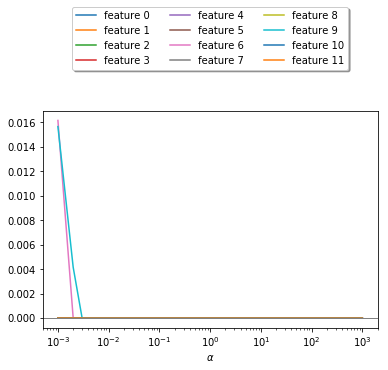

In [975]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,12):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Comparative Model Evaluation

According to the available evaluation of models, we can conclude that KNN regressor, SGD regressor, LASSO are underfitting. Ridge regressor, Polynomial Regressor and Linear regressor seem to be overfitting. But Linear regresssor can be considered as best fit for given dataset owing to high training and testing score overall. Hence We can proceed further applying the same to the whole dataset.

In [1234]:
# Applying Linear regression on Entire dataset

In [1211]:
X = final1[['Sector_score' , 'LOCATION_ID' , 'PARA_A' , 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1','Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History' , 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', ' Detection_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks', 'District' , 'Loss', 'LOSS_SCORE', 'History_score']]
y = final1['Audit_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [1212]:
from sklearn.linear_model import LinearRegression

In [1213]:
linearModel = LinearRegression(n_jobs = -1)
linearModel.fit(X_train,y_train.values.ravel())

lr_score = cross_val_score(linearModel,X_train,y_train,cv=11)
print("Cross Validation Scores are: {}".format(lr_score))

Cross Validation Scores are: [ 6.94352385e-01 -3.63782590e+00  1.70859889e-01 -8.25071507e+02
  1.53635648e-01  8.55067638e-01  8.95048927e-01  7.79467857e-01
  8.28219629e-01  7.86540053e-01  7.64680721e-01]


In [1214]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1215]:
lm.fit(X_train, y_train)
print('Train score: {:.4f}'.format(lm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lm.score(X_test, y_test)))

Train score: 0.8723
Test score: 0.5687


In [1216]:
y_te = lm.predict(X_test)
y_te

array([ 7.27868677e-03, -1.31684254e-03,  1.07512496e-02, -5.68922909e-04,
        1.76771251e-03, -3.92120624e-04,  1.03374712e-03,  4.17582780e-03,
        4.99966402e-03,  6.50017923e-04, -1.77520261e-03,  3.49784542e-03,
        5.25918797e-03,  9.05461523e-04,  5.91020228e-03, -3.74992071e-04,
       -7.59116155e-04,  9.80077242e-04,  3.46210334e-03,  6.03753423e-03,
       -4.33258490e-02,  1.65989907e-03,  4.33793093e-04, -7.23531149e-04,
        1.06449986e-02,  1.05116460e-02, -6.98791101e-04, -3.18142445e-05,
        6.85481321e-03, -8.86283089e-04, -9.89698222e-04,  5.27925143e-03,
       -1.67233653e-03,  1.53500432e-03,  1.00825870e-01, -2.21732777e-03,
        5.55348900e-04,  6.40263529e-04,  1.13888291e-04,  7.80959467e-04,
       -1.18287975e-03,  6.79552041e-03,  1.97052822e-02,  4.23023251e-04,
        3.89630115e-04,  1.80310207e-02,  7.72160073e-04,  5.63230364e-04,
        2.99063999e-02,  1.86116451e-02,  3.14793052e-02, -1.16755172e-03,
        6.79142056e-03,  

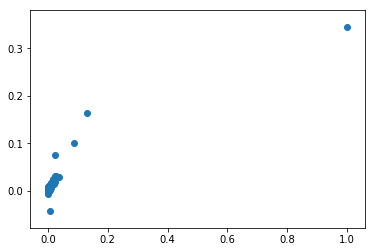

In [1217]:
plt.scatter(y_test,y_te)

# Classification models

In [44]:
final1.shape

(943, 35)

In [45]:
final1.isna().sum()

Sector_score       0
LOCATION_ID        0
PARA_A             0
Score_A            0
Risk_A             0
PARA_B             0
Score_B            0
Risk_B             0
TOTAL              0
numbers            0
Score_B.1          0
Risk_C             0
Money_Value        0
Score_MV           0
Risk_D             0
District_Loss      0
PROB               0
RiSk_E             0
History            0
Prob               0
Risk_F             0
Score              0
Inherent_Risk      0
CONTROL_RISK       0
 Detection_Risk    0
Audit_Risk         0
Risk               0
SCORE_A            0
SCORE_B            0
Marks              0
MONEY_Marks        0
District           0
Loss               0
LOSS_SCORE         0
History_score      0
dtype: int64

In [46]:
final1['Risk'].value_counts()

1.0    485
0.0    458
Name: Risk, dtype: int64

In [47]:
X_c = pd.DataFrame(final1.loc[:,final1.columns!='Risk'])
y_c = pd.DataFrame(final1['Risk'])

In [48]:
# Standard vs min max scaling

In [49]:
X_train_F,X_test_F,y_train_F,y_test_F = train_test_split(X_c,y_c,random_state = 0)
mmscaler = MinMaxScaler()
X_train_F = mmscaler.fit_transform(X_train_F)
X_test_F = mmscaler.transform(X_test_F)

In [50]:
X_train_F = pd.DataFrame(X_train_F,columns=['Sector_score' , 'LOCATION_ID' , 'PARA_A' , 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1','Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History' , 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', ' Detection_Risk', 'Audit_Risk', 'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks', 'District' , 'Loss', 'LOSS_SCORE', 'History_score'])

In [51]:
# MinMax Scaling
X_train_C,X_test_C,y_train_C,y_test_C = train_test_split(X_c,y_c,random_state = 0,test_size=.30)
stdscaler = MinMaxScaler()
X_train_C = stdscaler.fit_transform(X_train_C)
X_test_C = stdscaler.transform(X_test_C)


In [3]:
# Logistic regression using f1 score as scoring parameter

In [1112]:
from sklearn.linear_model import LogisticRegression
logit_param = {'penalty':['l1','l2'],'C':[0.01, 0.1, 1, 10, 100, 1000]}

logit = LogisticRegression(random_state = 0)
gridlogit1 = GridSearchCV(estimator = logit,param_grid = logit_param,n_jobs=-1,cv=10,scoring='f1')
gridlogit1.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [1113]:
gridlogit1.best_params_

{'C': 10, 'penalty': 'l2'}

In [1114]:
gridlogit1.score(X_test_C,y_test_C)

0.9642445213379469

In [1115]:
gridlogit1_train_prediction = gridlogit1.predict(X_train_C)
gridlogit1_test_prediction = gridlogit1.predict(X_test_C)

In [1116]:
print('Train f1_score: %.2f'%f1_score(gridlogit1_train_prediction, y_train_C))
print('Test f1_score: %.2f '%f1_score(gridlogit1_test_prediction, y_test_C))

Train f1_score: 1.00
Test f1_score: 0.96 


In [1117]:
print("CLassification_metrics :")
print(classification_report(y_test_C,gridlogit1_test_prediction))

CLassification_metrics :
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       409
         1.0       0.98      0.95      0.96       440

   micro avg       0.96      0.96      0.96       849
   macro avg       0.96      0.96      0.96       849
weighted avg       0.96      0.96      0.96       849



In [1118]:
# Logistic regression using roc_auc as scoring parameter

In [1119]:
gridlogit = GridSearchCV(estimator = logit,param_grid = logit_param,n_jobs=-1,cv=10,scoring='roc_auc')
gridlogit.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [1120]:
gridlogit.best_params_

{'C': 10, 'penalty': 'l1'}

In [1121]:
gridlogit.score(X_test_C,y_test_C)

0.9975716825961325

In [1122]:
gridlogit_train_prediction = gridlogit.predict(X_train_C)
gridlogit_test_prediction = gridlogit.predict(X_test_C)

In [1123]:
print('Train auc_score: %.2f'%roc_auc_score(gridlogit_train_prediction, y_train_C))
print('Test auc_score: %.2f '%roc_auc_score(gridlogit_test_prediction, y_test_C))

Train auc_score: 1.00
Test auc_score: 0.96 


In [1124]:
print("CLassification_metrics :")
print(classification_report(y_test_C,gridlogit_test_prediction))

CLassification_metrics :
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       409
         1.0       0.98      0.95      0.96       440

   micro avg       0.96      0.96      0.96       849
   macro avg       0.96      0.96      0.96       849
weighted avg       0.96      0.96      0.96       849



In [1125]:
Class_report_table = [['Logistic Regression',gridlogit1.best_params_ , gridlogit1.score(X_train_C, y_train_C), gridlogit1.score(X_test_C, y_test_C), f1_score(gridlogit1_train_prediction, y_train_C), f1_score(gridlogit1_test_prediction, y_test_C) ]]


# KnnClassifier

In [1126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [1127]:
X = final1[['Sector_score' , 'LOCATION_ID' , 'PARA_A' , 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1','Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History' , 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', ' Detection_Risk', 'Audit_Risk', 'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks', 'District' , 'Loss', 'LOSS_SCORE', 'History_score']].values
y = final1['Risk'].values

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (943, 34)
Y vector dimensionality: (943,)


In [1128]:
# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.97894737 1.         1.         1.         0.98947368 1.
 0.9787234  1.         0.97849462 0.78494624]


In [1129]:
print(scores.mean())

0.9710585317101952


In [1130]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.9936618141097424, 0.9915227155053042, 0.9947144456886898, 0.9689420703440138, 0.9710585317101952, 0.9699947019229611, 0.9710699707401655, 0.9678784813784634, 0.9732090693446038, 0.9710814097701357, 0.9732090693446038, 0.9613925513853268, 0.9613925513853268, 0.9517380100904287, 0.9528018398776628, 0.9453321533070838, 0.9463959830943178, 0.936718563739479, 0.9377938325566835, 0.9377938325566835, 0.9388576623439174, 0.9356432949222748, 0.9335492299726666, 0.9324854001854327, 0.9314327686064854, 0.9260678635504341, 0.9292822309720767, 0.9282184011848427, 0.9303346217293406, 0.9260678635504339]


Text(0, 0.5, 'Cross-Validated Accuracy')

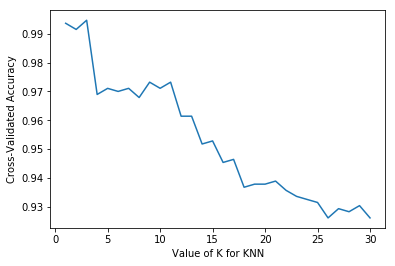

In [1131]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [1132]:
from sklearn.model_selection import GridSearchCV

In [1133]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [1134]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [1135]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [1136]:
# fit the grid with data
grid.fit(X, y)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1137]:
# view the complete results (list of named tuples)
from sklearn.utils.testing import ignore_warnings
grid.cv_results_

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.00300691, 0.00310414, 0.00268316, 0.00298452, 0.00257385,
        0.00248652, 0.00286121, 0.00268898, 0.00322235, 0.00308776,
        0.00299747, 0.00279944, 0.00278537, 0.00281074, 0.0026854 ,
        0.0027817 , 0.00277803, 0.00237179, 0.00265412, 0.00286438,
        0.00283172, 0.00256917, 0.00252192, 0.00279214, 0.00261922,
        0.00276072, 0.00269113, 0.00279281, 0.00265117, 0.00264695]),
 'std_fit_time': array([0.00011143, 0.00067917, 0.00064126, 0.00016241, 0.00066539,
        0.0005231 , 0.00013757, 0.00040647, 0.00118516, 0.00083203,
        0.0007866 , 0.00031753, 0.00061589, 0.00036259, 0.00042952,
        0.00036862, 0.00040272, 0.00048835, 0.00046156, 0.00029239,
        0.00042774, 0.00044269, 0.00049299, 0.00039877, 0.00045798,
        0.00035912, 0.00045609, 0.00040266, 0.00043562, 0.0004748 ]),
 'mean_score_time': array([0.00475426, 0.00551808, 0.00547214, 0.00584214, 0.00609334,
        0.00608673, 0.00639172, 0.00677328, 0.00802095, 0.00

In [1138]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9946977730646872
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


In [1139]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knnC = GridSearchCV(knn, param_grid=param_grid, cv = 10, scoring='f1')
grid_knnC.fit(X_train_C, y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [1158]:
grid_knnC.score(X_train_C, y_train_C)

1.0

In [1159]:
grid_knnC.score(X_test_C,y_test_C)

0.9757225433526011

In [1160]:
gridknnC_train_prediction = grid_knnC.predict(X_train_C)
gridknnC_test_prediction = grid_knnC.predict(X_test_C)

In [1161]:
print('Train F1 score: %.2f'%f1_score(gridknnC_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridknnC_test_prediction, y_test_C))

Train F1 score: 1.00
Test F1 score: 0.98 


In [1162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_C, gridknnC_test_prediction)

In [1163]:
cm

array([[406,   3],
       [ 18, 422]], dtype=int64)

In [1164]:
numer = cm[0][0] + cm[1][1]
denom = numer + cm[0][1] + cm[1][0]
accuracy = (numer / denom) * 100

In [1165]:
accuracy

97.52650176678446

In [1166]:
Class_report_table =Class_report_table + [['Knn Classifier',grid_knnC.best_params_, grid_knnC.score(X_train_C, y_train_C), grid_knnC.score(X_test_C, y_test_C), f1_score(gridknnC_train_prediction, y_train_C), f1_score(gridknnC_test_prediction, y_test_C) ]]

# LinearSVC

In [1167]:
from sklearn.svm import SVC,LinearSVC
lsvc_param = {'C':[0.1, 1, 10, 100]}
linearsvc = SVC(kernel = 'linear',random_state=0)
gridlinearsvc = GridSearchCV(estimator = linearsvc,param_grid = lsvc_param,n_jobs=-1,cv=10,scoring='f1')
gridlinearsvc.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [1168]:
gridlinearsvc.score(X_train_C,y_train_C)

1.0

In [1169]:
gridlinearsvc.score(X_test_C,y_test_C)

0.9587750294464075

In [1170]:
gridlinearsvc.best_params_

{'C': 10}

In [1171]:
gridlinearsvc_train_prediction = gridlinearsvc.predict(X_train_C)
gridlinearsvc_test_prediction = gridlinearsvc.predict(X_test_C)

In [1172]:
print('Train F1 score: %.2f'%f1_score(gridlinearsvc_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridlinearsvc_test_prediction, y_test_C))

Train F1 score: 1.00
Test F1 score: 0.96 


In [1173]:
Class_report_table =Class_report_table + [['LinearSVC ',gridlinearsvc.best_params_, gridlinearsvc.score(X_train_C,y_train_C), gridlinearsvc.score(X_test_C,y_test_C), roc_auc_score(gridlinearsvc_train_prediction, y_train_C), roc_auc_score(gridlinearsvc_test_prediction, y_test_C) ]]

# Gaussian SVC

In [1174]:
svc_param = {'C':[0.1, 1, 10, 100,1000],'gamma':[0.01,0.1,1,10,100]}
svc = SVC(kernel = 'rbf')
gridsvc = GridSearchCV(estimator = svc,param_grid = svc_param,n_jobs=-1,cv=10,scoring='f1')
gridsvc.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [1175]:
gridsvc.best_params_

{'C': 100, 'gamma': 0.1}

In [1176]:
gridsvc_train_prediction = gridsvc.predict(X_train_C)
gridsvc_test_prediction = gridsvc.predict(X_test_C)

In [1177]:
print('Train F1 score: %.2f'%f1_score(gridsvc_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridsvc_test_prediction, y_test_C))

Train F1 score: 1.00
Test F1 score: 0.98 


In [1178]:
Class_report_table =Class_report_table + [['GaussianSVC ',gridsvc.best_params_, gridsvc.score(X_train_C, y_train_C), gridsvc.score(X_test_C, y_test_C), f1_score(gridsvc_train_prediction, y_train_C), f1_score(gridsvc_test_prediction, y_test_C) ]]

In [1179]:
#Sigmoid Kernel

In [1180]:
svc_param = {'C':[0.1, 1, 10, 100,1000],'gamma':[0.01,0.1,1,10,100]}
svc = SVC(kernel = 'sigmoid')
gridsvc = GridSearchCV(estimator = svc,param_grid = svc_param,n_jobs=-1,cv=10,scoring='f1')
gridsvc.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [1181]:
gridsvc.best_params_

{'C': 1000, 'gamma': 0.01}

In [1182]:
gridsvc_train_prediction = gridsvc.predict(X_train_C)
gridsvc_test_prediction = gridsvc.predict(X_test_C)

In [1183]:
print('Train F1 score: %.2f'%f1_score(gridsvc_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridsvc_test_prediction, y_test_C))

Train F1 score: 1.00
Test F1 score: 0.96 


In [1184]:
Class_report_table =Class_report_table + [['SigmoidSVC ',gridsvc.best_params_, gridsvc.score(X_train_C, y_train_C), gridsvc.score(X_test_C, y_test_C), f1_score(gridsvc_train_prediction, y_train_C), f1_score(gridsvc_test_prediction, y_test_C) ]]

In [1185]:
#Polynomial SVC

In [1186]:
svc_param = {'C':[0.1, 1, 10, 100,1000],'gamma':[0.01,0.1,1,10,100]}
svc = SVC(kernel = 'poly')
gridsvc = GridSearchCV(estimator = svc,param_grid = svc_param,n_jobs=-1,cv=10,scoring='f1')
gridsvc.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [1187]:
gridsvc.best_params_

{'C': 0.1, 'gamma': 10}

In [1188]:
gridsvc_train_prediction = gridsvc.predict(X_train_C)
gridsvc_test_prediction = gridsvc.predict(X_test_C)

In [1189]:
print('Train F1 score: %.2f'%f1_score(gridsvc_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridsvc_test_prediction, y_test_C))

Train F1 score: 1.00
Test F1 score: 0.97 


In [1190]:
Class_report_table =Class_report_table + [['PolynomialSVC ',gridsvc.best_params_, gridsvc.score(X_train_C, y_train_C), gridsvc.score(X_test_C, y_test_C), f1_score(gridsvc_train_prediction, y_train_C), f1_score(gridsvc_test_prediction, y_test_C) ]]

# RandomClassifier

In [1191]:
from sklearn.ensemble import RandomForestClassifier
rf_param = {'bootstrap':[True],'n_estimators' : [500,1000],'min_samples_leaf': [10,20,50]}
rf = RandomForestClassifier(random_state = 0)
rfgrid = GridSearchCV(estimator=rf,param_grid=rf_param,n_jobs=-1,cv = 10,scoring='f1')
rfgrid.fit(X_train_C,y_train_C.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'n_estimators': [500, 1000], 'min_samples_leaf': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [1192]:
rfgrid.best_params_

{'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 500}

In [1193]:
gridrf_train_prediction = gridsvc.predict(X_train_C)
gridrf_test_prediction = gridsvc.predict(X_test_C)

In [1194]:
print('Train F1 score: %.2f'%f1_score(gridrf_train_prediction, y_train_C))
print('Test F1 score: %.2f '%f1_score(gridrf_test_prediction, y_test_C))

Train F1 score: 1.00
Test F1 score: 0.97 


In [1195]:
Class_report_table =Class_report_table + [['Random_Forest ',rfgrid.best_params_, rfgrid.score(X_train_C, y_train_C), rfgrid.score(X_test_C, y_test_C), f1_score(gridrf_train_prediction, y_train_C), f1_score(gridrf_test_prediction, y_test_C)]]

In [1196]:
Class_report_table = pd.DataFrame(Class_report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train F1 score', 'Test F1 score'])

In [1197]:

Class_report_table

,Model name,Model parameter,Train accuracy,Test accuracy,Train F1 score,Test F1 score
0,Logistic Regression,"{'C': 10, 'penalty': 'l2'}",1.000000,0.964245,1.0,0.964245
1,Knn Classifier,{'n_neighbors': 1},1.000000,0.975723,1.0,0.975723
2,LinearSVC,{'C': 10},1.000000,0.958775,1.0,0.960055
3,Knn Classifier,{'n_neighbors': 1},1.000000,0.975723,1.0,0.975723
4,LinearSVC,{'C': 10},1.000000,0.958775,1.0,0.960055
5,GaussianSVC,"{'C': 100, 'gamma': 0.1}",1.000000,0.983834,1.0,0.983834
6,SigmoidSVC,"{'C': 1000, 'gamma': 0.01}",1.000000,0.958775,1.0,0.958775
7,PolynomialSVC,"{'C': 0.1, 'gamma': 10}",1.000000,0.965278,1.0,0.965278
8,Random_Forest,"{'bootstrap': True, 'min_samples_leaf': 10, 'n...",0.977273,0.967136,1.0,0.965278


From above evaluatory results obtained, we can conclude that Gaussian SVC can be considered as best fit for given dataset. Hence we proceed by applying the same classifier over the entire dataset.

# GaussianSVC

In [1199]:
gaussiansvcF = SVC(kernel = 'rbf',random_state=0,C=100)
gaussiansvcF.fit(X_train_F,y_train_F.values.ravel())

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [1200]:
X_train_F.shape

(707, 34)

In [1201]:
X_test_F.shape

(236, 34)

In [1202]:
print(gaussiansvcF.score(X_train_F,y_train_F))
print(gaussiansvcF.score(X_test_F,y_test_F))

0.9971711456859972
0.9915254237288136


In [1203]:
finalgaussianSVC_train_prediction = gaussiansvcF.predict(X_train_F)
finalgaussianSVC_test_prediction = gaussiansvcF.predict(X_test_F)

In [1204]:
print('Final Train F1 score: %.2f'%f1_score(finalgaussianSVC_train_prediction, y_train_F))
print('Final Test F1 score: %.2f '%f1_score(finalgaussianSVC_test_prediction, y_test_F))

Final Train F1 score: 1.00
Final Test F1 score: 0.99 


In [1205]:
print("Confusion Metrics is :")
print(confusion_matrix(finalgaussianSVC_test_prediction,y_test_F))

Confusion Metrics is :
[[118   2]
 [  0 116]]


In [1206]:
print("CLassification_metrics :")
print(classification_report(y_test_F,finalgaussianSVC_test_prediction))

CLassification_metrics :
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       118
         1.0       1.00      0.98      0.99       118

   micro avg       0.99      0.99      0.99       236
   macro avg       0.99      0.99      0.99       236
weighted avg       0.99      0.99      0.99       236



# Plotting precision Recall Curve

Text(0.5, 1.0, 'Final Test F1 score: 0.99 ')

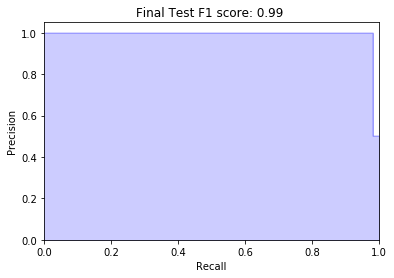

In [1207]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_F,finalgaussianSVC_test_prediction)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Final Test F1 score: %.2f '%f1_score(finalgaussianSVC_test_prediction, y_test_F))

# Plotting AUC ROC curve

C:\Users\anike\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


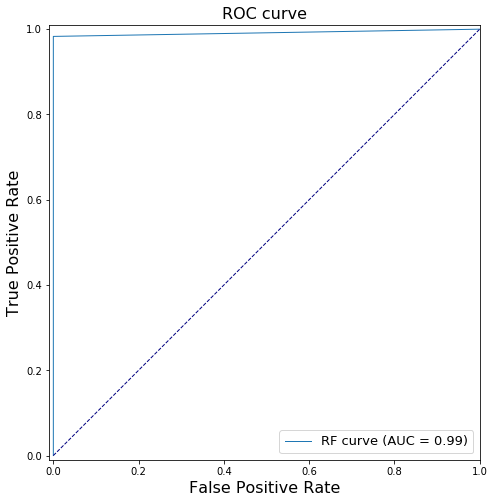

In [1208]:
fpr_rf, tpr_rf, _ = roc_curve(y_test_F, finalgaussianSVC_test_prediction)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))


plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()